# Group 5 
# Group Project: Creating Visualization: The Good, the Bad, and the Ugly

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 10_000)
pd.set_option('display.width', 0)  # auto-detects available width
plt.style.use('seaborn-v0_8') # had to switch from 'seaborn' to 'seaborn-v0_8' due to seaborn changed style name in matplotlib update
pd.set_option('display.max_columns', 500) # used set_option to show all columns and at maximum of 500 columns
pd.set_option('display.max_rows', None) #wanting to show all rows for data
%matplotlib inline

### Loading the dataset

In [2]:
df_test = pd.read_csv(r"C:\Users\price\Documents\GitHub\DATA6550-Visualization\Data\cleaned\cleaned_test.csv")
df_train = pd.read_csv(r"C:\Users\price\Documents\GitHub\DATA6550-Visualization\Data\cleaned\cleaned_train.csv")

In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
 8   Title        418 non-null    object 
 9   family_size  418 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 32.8+ KB


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   Title        891 non-null    object 
 10  family_size  891 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family_size
0,1,0,3,male,22.0,1,0,7.2500,S,Mr,2
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs,2
2,3,1,3,female,26.0,0,0,7.9250,S,Miss,1
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs,2
4,5,0,3,male,35.0,0,0,8.0500,S,Mr,1


In [6]:
df_test.tail()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family_size
413,1305,3,male,29.5,0,0,8.0500,S,Mr,1
414,1306,1,female,39.0,0,0,108.9000,C,Other,1
415,1307,3,male,38.5,0,0,7.2500,S,Mr,1
416,1308,3,male,29.5,0,0,8.0500,S,Mr,1
417,1309,3,male,30.5,1,1,22.3583,C,Master,3


## Adding survived from gender_submission.csv back to df_test

In [7]:
df_gender = pd.read_csv(r"C:\Users\price\Documents\GitHub\DATA6550-Visualization\Data\gender_submission.csv")

In [8]:
display(df_gender.head())
display(df_test.head())

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family_size
0,892,3,male,34.5,0,0,7.8292,Q,Mr,1
1,893,3,female,47.0,1,0,7.0000,S,Mrs,2
2,894,2,male,62.0,0,0,9.6875,Q,Mr,1
3,895,3,male,27.0,0,0,8.6625,S,Mr,1
4,896,3,female,22.0,1,1,12.2875,S,Mrs,3


In [9]:
df_test_joined = df_test.merge(df_gender, on='PassengerId', how='left')
display(df_test_joined.head())

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family_size,Survived
0,892,3,male,34.5,0,0,7.8292,Q,Mr,1,0
1,893,3,female,47.0,1,0,7.0000,S,Mrs,2,1
2,894,2,male,62.0,0,0,9.6875,Q,Mr,1,0
3,895,3,male,27.0,0,0,8.6625,S,Mr,1,0
4,896,3,female,22.0,1,1,12.2875,S,Mrs,3,1


In [10]:
df_test_joined.insert(1, 'Survived', df_test_joined.pop('Survived'))
display(df_test_joined.head())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family_size
0,892,0,3,male,34.5,0,0,7.8292,Q,Mr,1
1,893,1,3,female,47.0,1,0,7.0000,S,Mrs,2
2,894,0,2,male,62.0,0,0,9.6875,Q,Mr,1
3,895,0,3,male,27.0,0,0,8.6625,S,Mr,1
4,896,1,3,female,22.0,1,1,12.2875,S,Mrs,3


### Encoding Sex and Title

In [11]:
df_test_joined['Sex'] = df_test_joined['Sex'].map({'male': 0, 'female': 1})
df_test_joined.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family_size
0,892,0,3,0,34.5,0,0,7.8292,Q,Mr,1
1,893,1,3,1,47.0,1,0,7.0000,S,Mrs,2
2,894,0,2,0,62.0,0,0,9.6875,Q,Mr,1
3,895,0,3,0,27.0,0,0,8.6625,S,Mr,1
4,896,1,3,1,22.0,1,1,12.2875,S,Mrs,3


In [12]:
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family_size
0,1,0,3,0,22.0,1,0,7.2500,S,Mr,2
1,2,1,1,1,38.0,1,0,71.2833,C,Mrs,2
2,3,1,3,1,26.0,0,0,7.9250,S,Miss,1
3,4,1,1,1,35.0,1,0,53.1000,S,Mrs,2
4,5,0,3,0,35.0,0,0,8.0500,S,Mr,1


In [13]:
display(df_train['Title'].value_counts())
display(df_test_joined['Title'].value_counts())

Title
Mr        518
Miss      183
Mrs       125
Master     40
Other      12
Dr          7
Rev         6
Name: count, dtype: int64

Title
Mr        240
Miss       79
Mrs        72
Master     21
Other       3
Rev         2
Dr          1
Name: count, dtype: int64

In [14]:
df_test_joined['Title'] = df_test_joined['Title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Other': 4, 'Rev': 5, 'Dr': 6})
df_train['Title'] = df_train['Title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Other': 4, 'Rev': 5, 'Dr': 6})

In [15]:
display(df_test_joined['Title'].value_counts())
display(df_train['Title'].value_counts())   

Title
0    240
1     79
2     72
3     21
4      3
5      2
6      1
Name: count, dtype: int64

Title
0    518
1    183
2    125
3     40
4     12
6      7
5      6
Name: count, dtype: int64

### Dummy Variables for Embarkation

In [16]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], drop_first= False)
df_test_joined = pd.get_dummies(df_test_joined, columns=['Embarked'], drop_first=False)

In [17]:
display(df_train.head())
display(df_test_joined.head())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,family_size,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,2,False,False,True
1,2,1,1,1,38.0,1,0,71.2833,2,2,True,False,False
2,3,1,3,1,26.0,0,0,7.9250,1,1,False,False,True
3,4,1,1,1,35.0,1,0,53.1000,2,2,False,False,True
4,5,0,3,0,35.0,0,0,8.0500,0,1,False,False,True


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,family_size,Embarked_C,Embarked_Q,Embarked_S
0,892,0,3,0,34.5,0,0,7.8292,0,1,False,True,False
1,893,1,3,1,47.0,1,0,7.0000,2,2,False,False,True
2,894,0,2,0,62.0,0,0,9.6875,0,1,False,True,False
3,895,0,3,0,27.0,0,0,8.6625,0,1,False,False,True
4,896,1,3,1,22.0,1,1,12.2875,2,3,False,False,True


## Decision Tree  

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

In [19]:
X_train = df_train.drop(columns=['Survived', 'PassengerId'])
y_train = df_train['Survived']
X_test = df_test_joined.drop(columns=['Survived', 'PassengerId'])
y_test = df_test_joined['Survived']

In [28]:

dt = DecisionTreeClassifier(random_state=6500)
dt.fit(X_train, y_train)
print("Training Accuracy:", accuracy_score(y_train, dt.predict(X_train)))
print("Testing Accuracy:", accuracy_score(y_test, dt.predict(X_test)))

Training Accuracy: 0.9842873176206509
Testing Accuracy: 0.7822966507177034


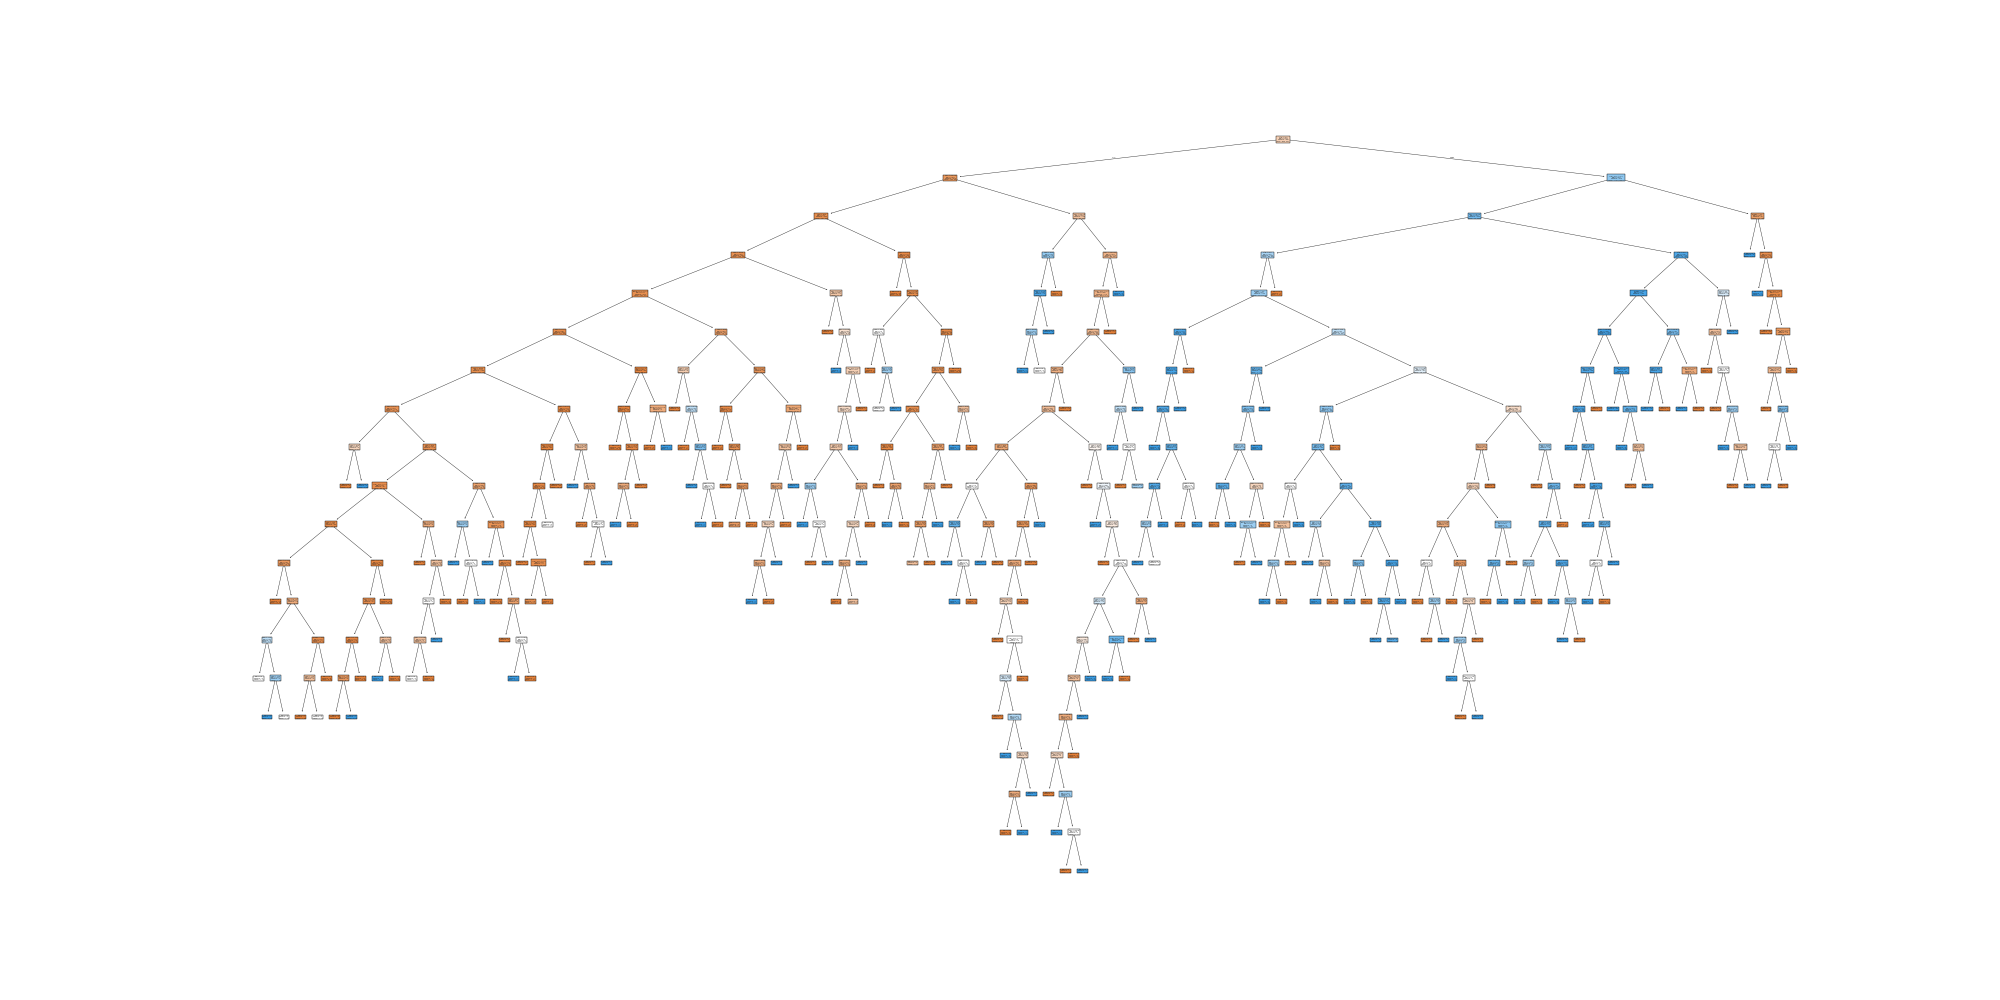

In [ ]:
# Create tree and save as SVG for infinite zoom
figure = plt.figure(figsize=(30, 20))
plot_tree(dt, feature_names=X_train.columns, filled=True, fontsize=10)
plt.savefig('decision_tree.svg', format='svg', bbox_inches='tight')
plt.savefig('decision_tree.png', format='png', dpi=300, bbox_inches='tight')
print("Tree saved! Open 'decision_tree.svg' in your browser or 'decision_tree.png' to zoom")
plt.show()